In [43]:
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter

vol_dict = {"A" : 88.6,
            "B" : 0.0,
            "O" : 0.0,
            "X" : 0.0,
            "J" : 0.0,
            "R" : 173.4,
            "N" : 114.1,
            "D" : 111.1,
            "C" : 108.5,
            "Q" : 143.8,
            "E" : 138.4,
            "G" : 60.1,
            "H" : 153.2,
            "I" : 166.7,
            "L" : 166.7,
            "K" : 168.6,
            "M" : 162.9,
            "F" : 189.9,
            "P" : 112.7,
            "S" : 89.0,
            "T" : 116.1,
            "W" : 227.8,
            "Y" : 193.6,
            "V" : 140}

In [5]:
ccs_df = pd.read_csv("https://github.com/ProteomicsML/IonMobility/blob/main/datasets/Meier_IM_CCS/combined_sm.zip?raw=true", compression="zip", index_col=0)

In [18]:
# Strip "_" from sequence
ccs_df["sequence"] = ccs_df["Modified sequence"].str.strip("_")

# Strip everything between "()" and "[]" from sequence
ccs_df["sequence"] = ccs_df["sequence"].str.replace(r"[\(\[].*?[\)\]]", "", regex=True)

In [25]:
X_matrix_count = pd.DataFrame(ccs_df["sequence"].apply(Counter).to_dict()).fillna(0.0).T

In [69]:
def to_predicted_ccs(row):
    vol_sum = sum([vol_dict[k]*v for k,v in row.to_dict().items()])
    drift = -40.0 + 2.0 * vol_sum / ccs_df.loc[row.index,"Charge"]
    ccs_est = 1.209 * vol_sum**(2.0 / 3.0)
    
    return ccs_est


ccs_df["predicted_CCS"] = X_matrix_count.apply(to_vol,axis=1)

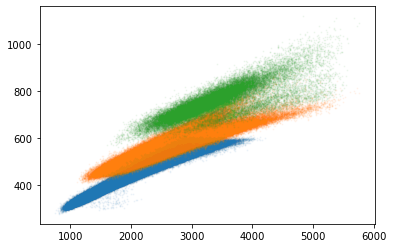

In [70]:
for c in range(2,5):
    plt.scatter(ccs_df.loc[ccs_df["Charge"]==c,"predicted_CCS"],ccs_df.loc[ccs_df["Charge"]==c,"CCS"],alpha=0.05,s=1)